# We begin by scraping housing data from Trulia.com

In [1]:
#Import the required libraries.  If necessary, pip install statements can be used to install libraries first.
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup as BS #BeautifulSoup is a Python library
                                    #for pulling data out of HTML and XML files.

import urllib.request
import urllib.parse
import urllib.error
import ssl
import re
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def get_headers():
    #Headers
    headers={'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
            'accept-language':'en-US,en;q=0.9',
            'cache-control':'max-age=0',
            'upgrade-insecure-requests':'1',
            'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36'}

    return headers


ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
count=1 # for pagination
#Create variables for editing URL filter criteria.
num_beds = '3p_beds' #minimum of 3 bedrooms in the home.
num_baths = '2p_baths' #minimum of 2 bathrooms in the home.
price_range = '100000-320000_price' #Set minimum and maximum price for the home.
min_size = '1750p_sqft' #set minimum size of home to 1750 sqft
house_type = 'SINGLE-FAMILY_HOME_type' #Only interested in single-family homes.
max_age = '1979p_built' #Built after asbestos outlawed.
sale_type = 'fsbo,resale_lt/' #This prevents new construction/buildable plans from appearing.

#Instatiate lists for holding scraped data.
price=[]
add1=[]
area=[]
bed=[]
bath=[]
floor=[]
urls = ["https://www.trulia.com/for_sale/Lafayette,IN/{}/{}/{}/{}/{}/{}/{}".format(num_beds,num_baths,price_range,min_size,house_type,max_age,sale_type),
        "https://www.trulia.com/for_sale/West_Lafayette,IN/{}/{}/{}/{}/{}/{}/{}".format(num_beds,num_baths,price_range,min_size,house_type,max_age,sale_type),
        "https://www.trulia.com/for_sale/Westfield,IN/{}/{}/{}/{}/{}/{}/{}".format(num_beds,num_baths,price_range,min_size,house_type,max_age,sale_type),
        "https://www.trulia.com/for_sale/Zionsville,IN/{}/{}/{}/{}/{}/{}/{}".format(num_beds,num_baths,price_range,min_size,house_type,max_age,sale_type)]

#Print statements can be uncommented for diagnostic purposes.  This section scrapes data from "cards" on Trulia's website.
for x in urls:
    count=1
    y=x
    while(count < 5):  # will go till 4 pages
        print(x)
        req = Request(x, headers=get_headers())  #req all headers
        htmlfile = urlopen(req)
        htmltext = htmlfile.read()
        #print (htmltext)
        soup = BS(htmltext,'html.parser')
        #print (soup.prettify())
       
        for tag in soup.findAll('div',attrs={'data-testid':'property-price'}): #gets price
                row = tag.get_text()
                if not row:
                    row="NA"
#                 print(row)
                price.append(row)

        #for tag in soup.findAll('div',attrs={'class':'Text__TextBase-sc-1i9uasc-0-div Text__TextContainerBase-sc-1i9uasc-1 lcNNgu'}): #gets add
                #row = tag.get_text()
                #print(row)
                #address.append(row)
               
        for tag in soup.findAll('div',attrs={'data-testid':'property-region'}): #add1
                row = tag.get_text()
                if not row:
                    row="NA"
#                 print(row)
                add1.append(row)
               
        for tag in soup.findAll('div',attrs={'data-testid':'property-street'}): #area code
                row = tag.get_text()
                if not row:
                    row="NA"
#                 print(row)
                area.append(row)
               
        for tag in soup.findAll('div',attrs={'data-testid':'property-beds'}): #bed
                row = tag.get_text()
                if not row:
                    row="NA"
#                 print(row)
                bed.append(row)
               
        for tag in soup.findAll('div',attrs={'data-testid':'property-baths'}): #bath
                row = tag.get_text()
                if not row:
                    row="NA"
#                 print(row)
                bath.append(row)
               
        for tag in soup.findAll('div',attrs={'data-testid':'property-floorSpace'}):  #floorsize
                row = tag.get_text()
                if not row:
                    row="NA"
#                 print(row)
                floor.append(row)
            
            # add more code here
        count=count+1
        page=str(count)+"_p"  # changes page,will go till page 4,total 120 links per city
        x=y+page
#Print statements to verify that the data has been loaded successfully into the lists.
print(add1[0:10])
print(area[0:10])
print(price[0:10])
print(bed[0:10])
print(bath[0:10])
print(floor[0:10])
data_frame = pd.DataFrame(list(zip(add1,area,price,bed,bath,floor)),columns=["Address","Location","Price","Bed","Bath","Size"]) #Create the dataframe by zipping the lists
data_frame.tail() #Check tail to ensure data is correct, and show how many houses were scraped in total.


https://www.trulia.com/for_sale/Lafayette,IN/3p_beds/2p_baths/100000-320000_price/1750p_sqft/SINGLE-FAMILY_HOME_type/1979p_built/fsbo,resale_lt/
https://www.trulia.com/for_sale/Lafayette,IN/3p_beds/2p_baths/100000-320000_price/1750p_sqft/SINGLE-FAMILY_HOME_type/1979p_built/fsbo,resale_lt/2_p
https://www.trulia.com/for_sale/Lafayette,IN/3p_beds/2p_baths/100000-320000_price/1750p_sqft/SINGLE-FAMILY_HOME_type/1979p_built/fsbo,resale_lt/3_p
https://www.trulia.com/for_sale/Lafayette,IN/3p_beds/2p_baths/100000-320000_price/1750p_sqft/SINGLE-FAMILY_HOME_type/1979p_built/fsbo,resale_lt/4_p
https://www.trulia.com/for_sale/West_Lafayette,IN/3p_beds/2p_baths/100000-320000_price/1750p_sqft/SINGLE-FAMILY_HOME_type/1979p_built/fsbo,resale_lt/
https://www.trulia.com/for_sale/West_Lafayette,IN/3p_beds/2p_baths/100000-320000_price/1750p_sqft/SINGLE-FAMILY_HOME_type/1979p_built/fsbo,resale_lt/2_p
https://www.trulia.com/for_sale/West_Lafayette,IN/3p_beds/2p_baths/100000-320000_price/1750p_sqft/SINGLE-FAM

,Address,Location,Price,Bed,Bath,Size
203,"Westfield, IN",3459 Heathcliff Ct,"$279,900",3bd,2ba,"2,326 sqft"
204,"Noblesville, IN",5202 Ashbrook Dr,"$250,000",3bd,2ba,"2,214 sqft"
205,"Noblesville, IN",4814 Ashbrook Dr,"$309,999",3bd,2ba,"2,615 sqft"
206,"Noblesville, IN",6388 Stokes Ave,"$303,685",5bd,3ba,"2,465 sqft"
207,"Noblesville, IN",6379 Stokes Ave,"$297,995",5bd,3ba,"2,460 sqft"


In [2]:
#Save the obtained dataframe to csv
data_frame.to_csv('new_Indiana_home.csv') #Export the data to a csv file

In [3]:
#import csv
import pandas as pd
import re
df = pd.read_csv('new_Indiana_home.csv') #Create a dataframe using the Trulia data that we scraped
df.head(5) #Verify that the data has been loaded successfully and correctly

,Unnamed: 0,Address,Location,Price,Bed,Bath,Size
0,0,"Jesco Hills, Lafayette, IN",2519 Rainbow Dr,"$319,000",4bd,4ba,"3,437 sqft"
1,1,"Lafayette, IN",1423 Sourgum Ln,"$207,000",3bd,3ba,"1,996 sqft"
2,2,"Lafayette, IN",4118 Penny Packers Mill Rd,"$225,000",3bd,3ba,"2,014 sqft"
3,3,"West Lafayette, IN",2135 Ringneck Rd,"$319,000",4bd,4ba,"2,432 sqft"
4,4,"Lafayette, IN",4305 Fletcher Dr,"$214,900",4bd,3ba,"3,592 sqft"


In [4]:
#Pre-processing of data - Stage 1
df = df[df['Price'] != 'Contact For Price'].reset_index(drop=True)
df['Price'] = df['Price'].map(lambda x: x.lstrip('$').rstrip('+')).str.replace(",","").astype(float)
df['Bed'] = df['Bed'].map(lambda x: x.lstrip('bd').rstrip('bds')).astype(float)
df['Bath'] = df['Bath'].map(lambda x: x.lstrip('ba').rstrip('AaBbCc')).astype(float)
df['Size'] = df['Size'].map(lambda x: x.lstrip('sf').rstrip('sqft')).str.replace(",","").astype(float)
df2 = df["Address"].apply(lambda x: x.split(","))
df['City'] = df2.apply(lambda x: " ".join(x[-2].split()[:]))

In [5]:
#Verify that pre-processing went as expected and datatypes make sense.
print(df.head())
print(df.dtypes.value_counts())

   Unnamed: 0                     Address                    Location  \
0           0  Jesco Hills, Lafayette, IN             2519 Rainbow Dr   
1           1               Lafayette, IN             1423 Sourgum Ln   
2           2               Lafayette, IN  4118 Penny Packers Mill Rd   
3           3          West Lafayette, IN            2135 Ringneck Rd   
4           4               Lafayette, IN            4305 Fletcher Dr   

      Price  Bed  Bath    Size            City  
0  319000.0  4.0   4.0  3437.0       Lafayette  
1  207000.0  3.0   3.0  1996.0       Lafayette  
2  225000.0  3.0   3.0  2014.0       Lafayette  
3  319000.0  4.0   4.0  2432.0  West Lafayette  
4  214900.0  4.0   3.0  3592.0       Lafayette  
float64    4
object     3
int64      1
dtype: int64


In [6]:
#Checking missing values 
df.isnull().sum()

Unnamed: 0    0
Address       0
Location      0
Price         0
Bed           0
Bath          0
Size          0
City          0
dtype: int64

In [7]:
#Checkng duplicate rows
print("Starting shape is ",df.shape)
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df['dupes'] = df.duplicated(subset=['Address','Price','Bed','Bath','Size'])
df=df[df['dupes'] == True].reset_index(drop=True)
df.shape

Starting shape is  (208, 8)


(172, 8)

# Now we need to associate latitude and longitude data with the addresses.

In [8]:
#Import libraries for obtaining GPS coordinates of house addresses and visualizing locations.
import pandas as pd
import numpy as np
!pip install geopandas
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
!pip install folium
import folium
from folium.plugins import FastMarkerCluster

     |████████████████████████████████| 962 kB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 38.7 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 24.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.4 MB 18.4 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 2.9 MB/s  eta 0:00:01


In [9]:
#test geocoding for a single address.
from geopy.geocoders import Bing
bing_key = 'AhZHj8FQAx0m0ZcVnkpgKxTRiUw--XNYwdNys48WdJWgjis8x8dJ62NSP1heq78N'
locator = Bing(api_key = bing_key, user_agent = 'housing_explorer')
address = df.iloc[3,2] + " " + df.iloc[3,1] + ", United States"
location = locator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [10]:
df['full_address'] = df['Location'] + " " + df['Address'] + ", United States"
df.head()

,Address,Location,Price,Bed,Bath,Size,City,dupes,full_address
0,"Jesco Hills, Lafayette, IN",2519 Rainbow Dr,319000.0,4.0,4.0,3437.0,Lafayette,True,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un..."
1,"Lafayette, IN",1423 Sourgum Ln,207000.0,3.0,3.0,1996.0,Lafayette,True,"1423 Sourgum Ln Lafayette, IN, United States"
2,"Lafayette, IN",4118 Penny Packers Mill Rd,225000.0,3.0,3.0,2014.0,Lafayette,True,"4118 Penny Packers Mill Rd Lafayette, IN, Unit..."
3,"West Lafayette, IN",2135 Ringneck Rd,319000.0,4.0,4.0,2432.0,West Lafayette,True,"2135 Ringneck Rd West Lafayette, IN, United St..."
4,"Lafayette, IN",4305 Fletcher Dr,214900.0,4.0,3.0,3592.0,Lafayette,True,"4305 Fletcher Dr Lafayette, IN, United States"


In [11]:
#Use geocoding to obtain lat and long of addresses in a dataframe
from geopy.extra.rate_limiter import RateLimiter
import time
df_test=df.iloc[:5] #create a subset of the dataframe to test code with
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
df_test['location'] = df_test['full_address'].apply(geocode)
df_test['point'] = df_test['location'].apply(lambda loc: tuple(loc.point) if loc else None)
df_test[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_test['point'].tolist(), index=df_test.index)
df_test.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,Address,Location,Price,Bed,Bath,Size,City,dupes,full_address,location,point,latitude,longitude,altitude
0,"Jesco Hills, Lafayette, IN",2519 Rainbow Dr,319000.0,4.0,4.0,3437.0,Lafayette,True,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un...","(2519 Rainbow Dr, Lafayette, IN 47904, United ...","(40.428314, -86.865967, 0.0)",40.428314,-86.865967,0.0
1,"Lafayette, IN",1423 Sourgum Ln,207000.0,3.0,3.0,1996.0,Lafayette,True,"1423 Sourgum Ln Lafayette, IN, United States","(1423 Sourgum Ln, Lafayette, IN 47905, United ...","(40.395855, -86.829083, 0.0)",40.395855,-86.829083,0.0
2,"Lafayette, IN",4118 Penny Packers Mill Rd,225000.0,3.0,3.0,2014.0,Lafayette,True,"4118 Penny Packers Mill Rd Lafayette, IN, Unit...","(4118 Penny Packers Mill Rd, Lafayette, IN 479...","(40.356407, -86.881485, 0.0)",40.356407,-86.881485,0.0
3,"West Lafayette, IN",2135 Ringneck Rd,319000.0,4.0,4.0,2432.0,West Lafayette,True,"2135 Ringneck Rd West Lafayette, IN, United St...","(2135 Ringneck Rd, West Lafayette, IN 47906, U...","(40.44897, -86.959076, 0.0)",40.448970,-86.959076,0.0
4,"Lafayette, IN",4305 Fletcher Dr,214900.0,4.0,3.0,3592.0,Lafayette,True,"4305 Fletcher Dr Lafayette, IN, United States","(4305 Fletcher Dr, Lafayette, IN 47909, United...","(40.355457, -86.847656, 0.0)",40.355457,-86.847656,0.0


In [12]:
#Since test worked, run on the full dataframe.
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
df['location'] = df['full_address'].apply(geocode)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)
df.head(25)

,Address,Location,Price,Bed,Bath,Size,City,dupes,full_address,location,point,latitude,longitude,altitude
0,"Jesco Hills, Lafayette, IN",2519 Rainbow Dr,319000.0,4.0,4.0,3437.0,Lafayette,True,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un...","(2519 Rainbow Dr, Lafayette, IN 47904, United ...","(40.428314, -86.865967, 0.0)",40.428314,-86.865967,0.0
1,"Lafayette, IN",1423 Sourgum Ln,207000.0,3.0,3.0,1996.0,Lafayette,True,"1423 Sourgum Ln Lafayette, IN, United States","(1423 Sourgum Ln, Lafayette, IN 47905, United ...","(40.395855, -86.829083, 0.0)",40.395855,-86.829083,0.0
2,"Lafayette, IN",4118 Penny Packers Mill Rd,225000.0,3.0,3.0,2014.0,Lafayette,True,"4118 Penny Packers Mill Rd Lafayette, IN, Unit...","(4118 Penny Packers Mill Rd, Lafayette, IN 479...","(40.356407, -86.881485, 0.0)",40.356407,-86.881485,0.0
3,"West Lafayette, IN",2135 Ringneck Rd,319000.0,4.0,4.0,2432.0,West Lafayette,True,"2135 Ringneck Rd West Lafayette, IN, United St...","(2135 Ringneck Rd, West Lafayette, IN 47906, U...","(40.44897, -86.959076, 0.0)",40.448970,-86.959076,0.0
4,"Lafayette, IN",4305 Fletcher Dr,214900.0,4.0,3.0,3592.0,Lafayette,True,"4305 Fletcher Dr Lafayette, IN, United States","(4305 Fletcher Dr, Lafayette, IN 47909, United...","(40.355457, -86.847656, 0.0)",40.355457,-86.847656,0.0
5,"Lafayette, IN",4030 Fletcher Dr,210000.0,3.0,3.0,3036.0,Lafayette,True,"4030 Fletcher Dr Lafayette, IN, United States","(4030 Fletcher Dr, Lafayette, IN 47909, United...","(40.359222, -86.848447, 0.0)",40.359222,-86.848447,0.0
6,"West Lafayette, IN",124 S 875 W,285000.0,3.0,3.0,2000.0,West Lafayette,True,"124 S 875 W West Lafayette, IN, United States","(124 S 875 W, West Lafayette, IN 47906, United...","(40.414595, -87.069837, 0.0)",40.414595,-87.069837,0.0
7,"Lafayette, IN",2604 Margesson Xing,177000.0,3.0,3.0,2400.0,Lafayette,True,"2604 Margesson Xing Lafayette, IN, United States","(2604 Margesson Crossing, Lafayette, IN 47909,...","(40.356659, -86.855088, 0.0)",40.356659,-86.855088,0.0
8,"West Lafayette, IN",1882 Ellison Dr,189900.0,3.0,3.0,1824.0,West Lafayette,True,"1882 Ellison Dr West Lafayette, IN, United States","(1882 Ellison Dr, West Lafayette, IN 47906, Un...","(40.470912, -86.940665, 0.0)",40.470912,-86.940665,0.0
9,"Lafayette, IN",4277 Tripoli Dr,319900.0,3.0,3.0,2121.0,Lafayette,True,"4277 Tripoli Dr Lafayette, IN, United States","(4277 Tripoli Dr, Lafayette, IN 47909, United ...","(40.355357, -86.833444, 0.0)",40.355357,-86.833444,0.0


In [13]:
#Clean up the dataframe a bit and remove the unnamed column
df_homes = df.drop(['location','point','altitude'],axis=1)
df_homes.reset_index(inplace=True)
df_homes.drop(df_homes.columns[df_homes.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df_homes.head()

,index,Address,Location,Price,Bed,Bath,Size,City,dupes,full_address,latitude,longitude
0,0,"Jesco Hills, Lafayette, IN",2519 Rainbow Dr,319000.0,4.0,4.0,3437.0,Lafayette,True,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un...",40.428314,-86.865967
1,1,"Lafayette, IN",1423 Sourgum Ln,207000.0,3.0,3.0,1996.0,Lafayette,True,"1423 Sourgum Ln Lafayette, IN, United States",40.395855,-86.829083
2,2,"Lafayette, IN",4118 Penny Packers Mill Rd,225000.0,3.0,3.0,2014.0,Lafayette,True,"4118 Penny Packers Mill Rd Lafayette, IN, Unit...",40.356407,-86.881485
3,3,"West Lafayette, IN",2135 Ringneck Rd,319000.0,4.0,4.0,2432.0,West Lafayette,True,"2135 Ringneck Rd West Lafayette, IN, United St...",40.448970,-86.959076
4,4,"Lafayette, IN",4305 Fletcher Dr,214900.0,4.0,3.0,3592.0,Lafayette,True,"4305 Fletcher Dr Lafayette, IN, United States",40.355457,-86.847656


In [14]:
#Create a map to visualize house locations
map_indiana = folium.Map(location=[40.166,-86.557], zoom_start=10)

# add markers to map
for lat, lng, add, price in zip(df['latitude'], df['longitude'], df['Location'], df['Price']):
    label = '{}, {}'.format(price, add)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_indiana)  

map_indiana

# Visualization shows that most of our addresses are correct, but some appear in obviously incorrect locations.  We should probably make some code to eliminate homes with these incorrect coordinates.

In [15]:
#I know approximately the region that I am interested in.  Therefore, I can set maximum and minimum latitude and longitude values, and check that the points fall within these ranges.
#Any coordinates outside this zone will be eliminated.
#Create acceptable latitude and longitude threshholds
lat_max = 40.73
lat_min = 39.88
lng_max = -85.87
lng_min = -87.17

#Convert latitude and longitude values to float type in dataframe
df_homes['latitude'] = df_homes['latitude'].astype(float)
df_homes['longitude'] = df_homes['longitude'].astype(float)

print("Starting shape is ", df_homes.shape)
df_homes['lat_check'] = df_homes['latitude'].apply(lambda x: x < lat_min or x > lat_max)
df_homes = df_homes[df_homes['lat_check'] == False].reset_index(drop=True)
print("Shape after dropping latitude outliers is ", df_homes.shape)
df_homes['lng_check'] = df_homes['longitude'].apply(lambda x: x < lng_min or x > lng_max)
df_homes = df_homes[df_homes['lng_check'] == False].reset_index(drop=True)
print("Shape after dropping longitude outliers is ", df_homes.shape)

Starting shape is  (172, 12)
Shape after dropping latitude outliers is  (141, 13)
Shape after dropping longitude outliers is  (141, 14)


In [16]:
#Looks like we have removed the incorrect coordinate addresses.  Let's visualize to be sure.
#Create a map to visualize house locations
map_indiana = folium.Map(location=[40.166,-86.557], zoom_start=10)

for lat, lng, add, price in zip(df_homes['latitude'], df_homes['longitude'], df_homes['Location'], df_homes['Price']):
    label = '{}, {}'.format(price, add)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_indiana)  

map_indiana

### Excellent.  There are no longer any markers outside of our designated area of acceptability.

Now it's time to gather some data from Foursquare.  Costco is our favorite store, so we need to know if there are any nearby.

In [18]:
#Establish credentials
CLIENT_ID = 'QUFSJQ0MD1TTDMU2MBNKE43MVECHVG4LLCXDUT2KNBBJKEIE' # your Foursquare ID
CLIENT_SECRET = 'HKE3PZU5JXAXHVIOF01B3PF2NOIIJGSEH0N01AEYP1P5CNCT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [23]:
venue_name = 'Costco'
costco_url = 'https://api.foursquare.com/v2/venues/search?near=Zionsville,_IN&query={}&client_id={}&client_secret={}&v={}'.format(venue_name,CLIENT_ID,CLIENT_SECRET, VERSION)
costco_url

'https://api.foursquare.com/v2/venues/search?near=Zionsville,_IN&query=Costco&client_id=QUFSJQ0MD1TTDMU2MBNKE43MVECHVG4LLCXDUT2KNBBJKEIE&client_secret=HKE3PZU5JXAXHVIOF01B3PF2NOIIJGSEH0N01AEYP1P5CNCT&v=20180605'

In [29]:
radius = 500
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, 39.9287, -86.234, VERSION, radius, LIMIT)
url
results_test = requests.get(url).json()
results_test

{'meta': {'code': 200, 'requestId': '5fe509ecda8249517f8d63e7'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Carmel',
  'headerFullLocation': 'Carmel',
  'headerLocationGranularity': 'city',
  'totalResults': 17,
  'suggestedBounds': {'ne': {'lat': 39.9332000045, 'lng': -86.22814274095332},
   'sw': {'lat': 39.9241999955, 'lng': -86.23985725904667}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4fca8817e4b0417a20ca3244',
       'name': 'Hoosier Heights Indianapolis',
       'location': {'address': '9850 Mayflower Park Dr',
        'lat': 39.929856215219324,
        'lng': -86.23816995933072,
        'labeledLatLngs': [{'label': 'display',
          'lat': 39.929856215219324,

In [39]:
#Find the locations of nearby Costco stores.
import requests # library to handle requests
results = requests.get(costco_url).json()
print(results)

venues = results['response']['venues']
costco_frame = pd.json_normalize(venues)
costco_locations = costco_frame[['id','name','location.address','location.lat','location.lng']]
costco_locations

{'meta': {'code': 200, 'requestId': '5fe50d15ba6fa474b870aefb'}, 'response': {'venues': [{'id': '4ae33851f964a520dc9121e3', 'name': 'Costco', 'location': {'address': '9010 Michigan Rd', 'crossStreet': 'btwn Vincennes Rd & W 92nd St', 'lat': 39.917311923791274, 'lng': -86.22762019938833, 'labeledLatLngs': [{'label': 'display', 'lat': 39.917311923791274, 'lng': -86.22762019938833}], 'postalCode': '46268', 'cc': 'US', 'city': 'Indianapolis', 'state': 'IN', 'country': 'United States', 'formattedAddress': ['9010 Michigan Rd (btwn Vincennes Rd & W 92nd St)', 'Indianapolis, IN 46268', 'United States']}, 'categories': [{'id': '52e816a6bcbc57f1066b7a54', 'name': 'Warehouse Store', 'pluralName': 'Warehouse Stores', 'shortName': 'Warehouse Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/default_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1608846613', 'hasPerk': False}, {'id': '4db5e39c5da3a76f445b3620', 'name': 'Costco Gasoline', 'location': {'address': '901

,id,name,location.address,location.lat,location.lng
0,4ae33851f964a520dc9121e3,Costco,9010 Michigan Rd,39.917312,-86.227620
1,4db5e39c5da3a76f445b3620,Costco Gasoline,9010 Michigan Rd,39.918123,-86.226552
2,4b367462f964a520d23525e3,Costco,6110 E 86th St,39.914035,-86.062033
3,4ced8d0d7db3224b5ab1222e,Costco Gasoline,6110 E 86th St,39.912990,-86.060847
4,4e66a3d0b0fbcbb043c8f769,Costco Food Court,6110 E 86th St,39.914077,-86.062139
5,576c2c6b498e8fac2bf2bc8d,Costco,4628 E County Line Rd,39.638273,-86.089478
6,50b7efb6e4b013295756fb14,Costco Food Court,9010 Michigan Rd,39.917290,-86.227581
7,4b0b1e68f964a520372d23e3,Costco Tire Service Center,6110 E 86th St,39.913981,-86.062134
8,4e2d95078877b69d49f5bb57,Costco Tire Service Center,9010 Michigan Rd,39.917304,-86.227656
9,576c3b96498edf505b327b14,Costco Gasoline,NaN,39.636651,-86.088169


In [40]:
#We are only interested in the store, and not auxiliary features such as pharmacy or gas station, so filter the dataframe accordingly.
costco_locations = costco_locations[costco_locations['name'] == 'Costco'].reset_index(drop=True).dropna()
costco_locations

,id,name,location.address,location.lat,location.lng
0,4ae33851f964a520dc9121e3,Costco,9010 Michigan Rd,39.917312,-86.227620
1,4b367462f964a520d23525e3,Costco,6110 E 86th St,39.914035,-86.062033
2,576c2c6b498e8fac2bf2bc8d,Costco,4628 E County Line Rd,39.638273,-86.089478


In [51]:
#Now we want to calculate the distance between the house and the nearest costco
from geopy import distance
house_loc = (df_homes.latitude[40],df_homes.longitude[40])
print(house_loc)
costco_loc = (costco_locations.loc[0,'location.lat'],costco_locations.loc[0,'location.lng'])
print(costco_loc)
print(distance.distance(house_loc,costco_loc).miles)


(40.470912, -86.940665)
(39.917311923791274, -86.22762019938833)
53.68695571124422


In [53]:
#Time to make a function to calculate the distance from the house to each costco, then store the shortest distance.
def get_costco_distance(h_lats,h_lngs,c_lats,c_lngs):
    distance_list =[] #create empty list to store distances
    
    for h_lat,h_lng in zip(h_lats,h_lngs): #loop through the latitude and longitude of the houses
        h_gps = (h_lat,h_lng) #create a variable to hold gps coordinates
        print("GPS units of house are: ", h_gps)
        min_distance = 500 #set an arbitrarily high distance to costco
        
        for c_lat,c_lng in zip(c_lats,c_lngs):#loop through the latitude and longitude of costco locations
            c_gps = (c_lat,c_lng)
            print("GPS units of costco are: ", c_gps)
            temp_distance = distance.distance(h_gps,c_gps).miles
            print("Temp distance is: ", temp_distance)
            if temp_distance < min_distance:
                min_distance = temp_distance
                print('New minimum distance is: ',min_distance)
        distance_list.append(min_distance)
    print(distance_list)
    return distance_list

In [54]:
distances = get_costco_distance(df_homes['latitude'],df_homes['longitude'],costco_locations['location.lat'],costco_locations['location.lng'])

GPS units of house are:  (40.428314, -86.865967)
GPS units of costco are:  (39.917311923791274, -86.22762019938833)
Temp distance is:  48.83152408451617
New minimum distance is:  48.83152408451617
GPS units of costco are:  (39.91403505548117, -86.06203299132233)
Temp distance is:  55.40388704463204
GPS units of costco are:  (39.63827327585381, -86.08947755397296)
Temp distance is:  68.31516808171816
GPS units of house are:  (40.395855, -86.829083)
GPS units of costco are:  (39.917311923791274, -86.22762019938833)
Temp distance is:  45.86934524748339
New minimum distance is:  45.86934524748339
GPS units of costco are:  (39.91403505548117, -86.06203299132233)
Temp distance is:  52.47987478646379
GPS units of costco are:  (39.63827327585381, -86.08947755397296)
Temp distance is:  65.3550194345343
GPS units of house are:  (40.356407, -86.881485)
GPS units of costco are:  (39.917311923791274, -86.22762019938833)
Temp distance is:  46.007856459359395
New minimum distance is:  46.007856459359

Temp distance is:  62.343494722404856
New minimum distance is:  62.343494722404856
GPS units of costco are:  (39.91403505548117, -86.06203299132233)
Temp distance is:  66.93706658425964
GPS units of costco are:  (39.63827327585381, -86.08947755397296)
Temp distance is:  82.8745574909357
GPS units of house are:  (40.584173, -86.835476)
GPS units of costco are:  (39.917311923791274, -86.22762019938833)
Temp distance is:  56.121932704922585
New minimum distance is:  56.121932704922585
GPS units of costco are:  (39.91403505548117, -86.06203299132233)
Temp distance is:  61.723895959451674
GPS units of costco are:  (39.63827327585381, -86.08947755397296)
Temp distance is:  76.294421876095
GPS units of house are:  (40.727333, -86.754021)
GPS units of costco are:  (39.917311923791274, -86.22762019938833)
Temp distance is:  62.421287793934106
New minimum distance is:  62.421287793934106
GPS units of costco are:  (39.91403505548117, -86.06203299132233)
Temp distance is:  66.96602220584823
GPS un

In [55]:
df_homes['dist_to_costco'] = distances
df_homes.head()

,index,Address,Location,Price,Bed,Bath,Size,City,dupes,full_address,latitude,longitude,lat_check,lng_check,dist_to_costco
0,0,"Jesco Hills, Lafayette, IN",2519 Rainbow Dr,319000.0,4.0,4.0,3437.0,Lafayette,True,"2519 Rainbow Dr Jesco Hills, Lafayette, IN, Un...",40.428314,-86.865967,False,False,48.831524
1,1,"Lafayette, IN",1423 Sourgum Ln,207000.0,3.0,3.0,1996.0,Lafayette,True,"1423 Sourgum Ln Lafayette, IN, United States",40.395855,-86.829083,False,False,45.869345
2,2,"Lafayette, IN",4118 Penny Packers Mill Rd,225000.0,3.0,3.0,2014.0,Lafayette,True,"4118 Penny Packers Mill Rd Lafayette, IN, Unit...",40.356407,-86.881485,False,False,46.007856
3,3,"West Lafayette, IN",2135 Ringneck Rd,319000.0,4.0,4.0,2432.0,West Lafayette,True,"2135 Ringneck Rd West Lafayette, IN, United St...",40.448970,-86.959076,False,False,53.327860
4,4,"Lafayette, IN",4305 Fletcher Dr,214900.0,4.0,3.0,3592.0,Lafayette,True,"4305 Fletcher Dr Lafayette, IN, United States",40.355457,-86.847656,False,False,44.630985


In [25]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [26]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

KeyError: 'groups'

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
manhattan_venues = getNearbyVenues(names = manhattan_data['Neighborhood'], latitudes = manhattan_data['Latitude'],longitudes = manhattan_data['Longitude'])

In [ ]:
print(manhattan_venues.shape)
manhattan_venues.head()

In [ ]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

In [ ]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

In [ ]:
print(manhattan_onehot.shape)
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

# End foursquare data gathering here.

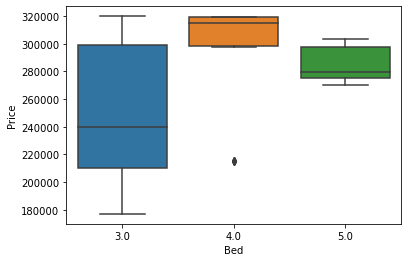

In [17]:
#checking Outliers 
import seaborn as sns
sns.boxplot(x="Bed", y="Price",data=df);

In [7]:
#Preprocessing Data - stage 2
#to remove records that capture few data from border of cities 
df = df.groupby("City").filter(lambda x : len(x)>5)

In [59]:
import numpy as np
df.rename(columns = {'Unnamed: 0':'Index'}, inplace = True)
df = df.reindex(list(np.arange(1,809,1)))
df.head()

,Index,Address,Location,Rent,Bed,Bath,Size,Description,Commute,Crime,Income,URL,Commute Percentage,Income,City
1,1.0,"Prescott, Oakland, CA",1687 8th St,1700.0,1.0,1.0,450.0,"1687 8th St, Oakland, CA is a 1 bedroom, 1 bat...",Commute60% of residents commute by car.,CrimeHigh,"$61,200",https://www.trulia.com/p/ca/oakland/1687-8th-s...,60.0,61200.0,Oakland
2,2.0,"Upper Laurel, Oakland, CA",Address Not Disclosed,1800.0,2.0,1.0,700.0,"This home in Oakland, CA is a 2 bedroom, 1 bat...",Commute85% of residents commute by car.,CrimeLowest,"$64,800",https://www.trulia.com/p/ca/oakland/address-no...,85.0,64800.0,Oakland
3,3.0,"Clinton, Oakland, CA",2243 12th Ave,2400.0,2.0,1.0,1017.0,"2243 12th Ave, Oakland, CA is a 2 bedroom, 1 b...",Commute70% of residents commute by car.,CrimeModerate,"$86,400",https://www.trulia.com/p/ca/oakland/2243-12th-...,70.0,86400.0,Oakland
4,4.0,"Clawson, Oakland, CA",1064 30th St,3199.0,3.0,2.0,1100.0,"1064 30th St, Oakland, CA is a 3 bedroom, 2 ba...",Commute67% of residents commute by car.,CrimeHigh,"$115,164",https://www.trulia.com/p/ca/oakland/1064-30th-...,67.0,115164.0,Oakland
5,5.0,"Hoover/Foster, Oakland, CA",692 31st St,2950.0,2.0,1.0,1000.0,"692 31st St, Oakland, CA is a 2 bedroom, 1 bat...",Commute58% of residents commute by car.,CrimeHigh,"$106,200",https://www.trulia.com/p/ca/oakland/692-31st-s...,58.0,106200.0,Oakland


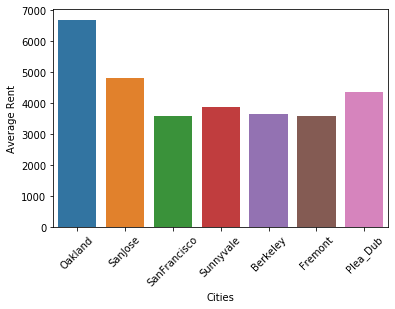

In [74]:
# Which is the most affordable city in Bay area?
import matplotlib.pyplot as plt
price= df[['price','Bed']]
price
price.mean()

Oakland= price[0:120]
Oakland
Col1= Oakland.loc[:,"price"].mean()

SanJose= price[120:240]
SanJose
Col2=SanJose.loc[:,"price"].mean()

SanFrancisco= price[240:360]
SanFrancisco
Col3=SanFrancisco.loc[:,"price"].mean()

Sunnyvale= price[360:469]
Sunnyvale
Col4=Sunnyvale.loc[:,"price"].mean()

Berkeley= price[469:571]
Berkeley
Col5=Berkeley.loc[:,"price"].mean()

Fremont= price[571:687]
Fremont
Col6=Fremont.loc[:,"price"].mean()

Plea_Dub= price[687:809]
Plea_Dub
Col7=Plea_Dub.loc[:,"price"].mean()



dff=pd.DataFrame({'Cities':['Oakland','SanJose','SanFrancisco','Sunnyvale','Berkeley','Fremont','Plea_Dub'],
                   'Average price':[Col1,Col2,Col3,Col4,Col5,Col6,Col7]})
                  
sns.barplot(x='Cities',y='Average price',data=dff)
plt.xticks(rotation=45)
plt.show()


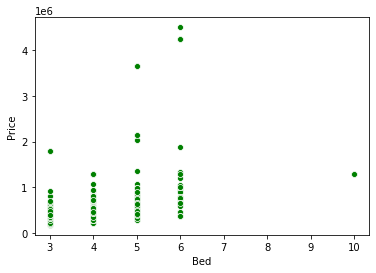

In [24]:
price1= df[['Price','Bed']]
price1
sns.scatterplot(x='Bed', y='Price',color ='g', data=price1)
plt.show()